# Taller 3: Segmentación

Utilizando únicamente las operaciones vistas hasta el momento, segmente la figura de tal manera que los personajes aparezcan sean segmentados correctamente (en blanco), conservando de la mejor manera la figura original, sin introducir artefactos.  Esta es la imagen original:

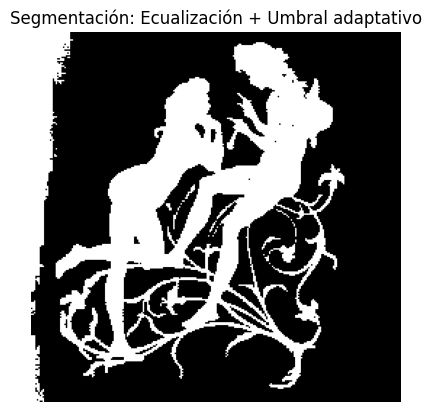

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# Cargar imagen en escala de grises
PATH = './imagenes/'
img = cv2.imread(PATH + 'amour2.png', cv2.IMREAD_GRAYSCALE)

# 1. Ecualización de histograma
img_eq = cv2.equalizeHist(img)

# 2. Umbralización adaptativa
ti = threshold_local(img_eq, block_size=123, method='mean', offset=16)
binaria = (img_eq > ti).astype(np.uint8) * 255

# 3. Invertir para que los personajes queden en blanco
segmentada = 255 - binaria

plt.imshow(segmentada, cmap='gray')
plt.title('Segmentación: Ecualización + Umbral adaptativo')
plt.axis('off')
plt.show()

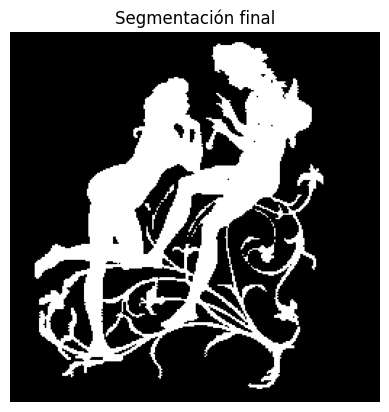

In [248]:
# Crear máscaras para eliminar el borde izquierdo
mask = np.ones_like(segmentada, dtype=np.uint8) * 255
mask[:, :9] = 0 
mask2 = np.ones_like(segmentada, dtype=np.uint8) * 255
mask2[:120, :29] = 0
segmentada_mascara = cv2.bitwise_and(segmentada, mask)
segmentada_mascara = cv2.bitwise_and(segmentada_mascara, mask2)

plt.imshow(segmentada_mascara, cmap='gray')
plt.title('Segmentación final')
plt.axis('off')
plt.show()

Se cargó la imagen en escala de grises y se aplicó ecualización de histograma para mejorar el contraste. Luego, se realizó una umbralización adaptativa para segmentar los personajes en blanco y el fondo en negro. Para eliminar artefactos en los bordes, se crearon dos máscaras que anulan las regiones no deseadas mediante operaciones lógicas AND. Así, se obtuvo una segmentación limpia y sin bordes indeseados.